# **Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import random
import os
import glob

In [2]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!rm *

# **Read data**

In [6]:
eskandari = pd.read_csv('/content/drive/MyDrive/Upstream_models/esk_water_balance_result.csv').iloc[:, 0:7]
ghale_shahrokh = pd.read_csv('/content/drive/MyDrive/Upstream_models/ghale_sha_water_balance_result.csv').iloc[:, 0:7]

In [7]:
eskandari.rename(columns={'month_num':'month', 'temp_mean': 'tempreture'}, inplace=True)
ghale_shahrokh.rename(columns={'month_num':'month', 'temp_mean': 'tempreture'}, inplace=True)

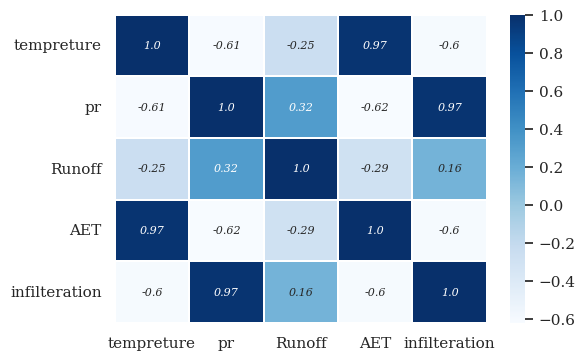

In [8]:
from matplotlib import rcParams
sns.set(font='serif')
rcParams['figure.figsize'] = 6, 4
df = eskandari.drop(['month', 'year'], axis=1)
sns.heatmap(df.corr(), annot=True,cmap='Blues',fmt='.2', linewidths=0.1,
             annot_kws={'fontsize': 8, 'fontstyle': 'italic'})

plt.savefig('/content/drive/MyDrive/Upstream_basin_models/esk_correlation.png', dpi=300)

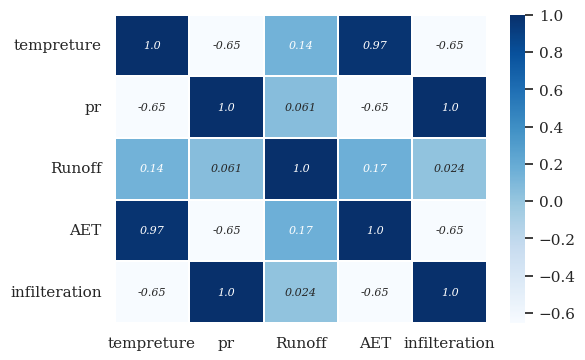

In [9]:
from matplotlib import rcParams
sns.set(font='serif')
rcParams['figure.figsize'] = 6, 4
df = ghale_shahrokh.drop(['month', 'year'], axis=1)
sns.heatmap(df.corr(), annot=True,cmap='Blues',fmt='.2', linewidths=0.1,
             annot_kws={'fontsize': 8, 'fontstyle': 'italic'})

plt.savefig('/content/drive/MyDrive/Upstream_basin_models/ghal_correlation.png', dpi=300)

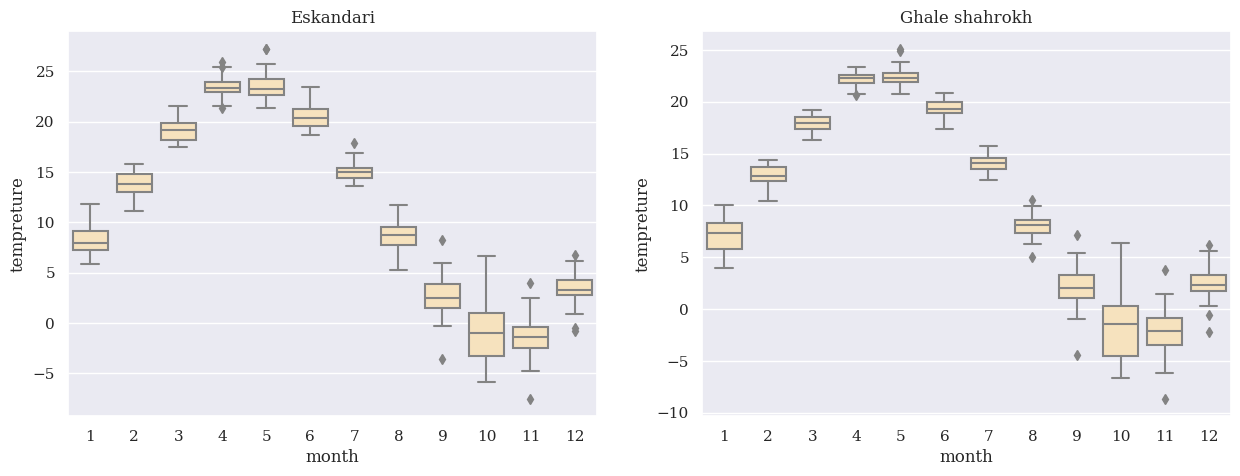

In [10]:
rcParams['figure.figsize'] = 15, 5
fig, ax = plt.subplots(1, 2)
ax1 = sns.boxplot(x='month',y='tempreture',data=eskandari,ax=ax[0], color='moccasin')
ax1.set_title('Eskandari',fontsize=12)
ax2 = sns.boxplot(x='month',y='tempreture',data=ghale_shahrokh,ax=ax[1], color='moccasin')
ax2.set_title('Ghale shahrokh',fontsize=12)

plt.savefig('/content/drive/MyDrive/Upstream_basin_models/tempreture.png', dpi=300)
plt.show()

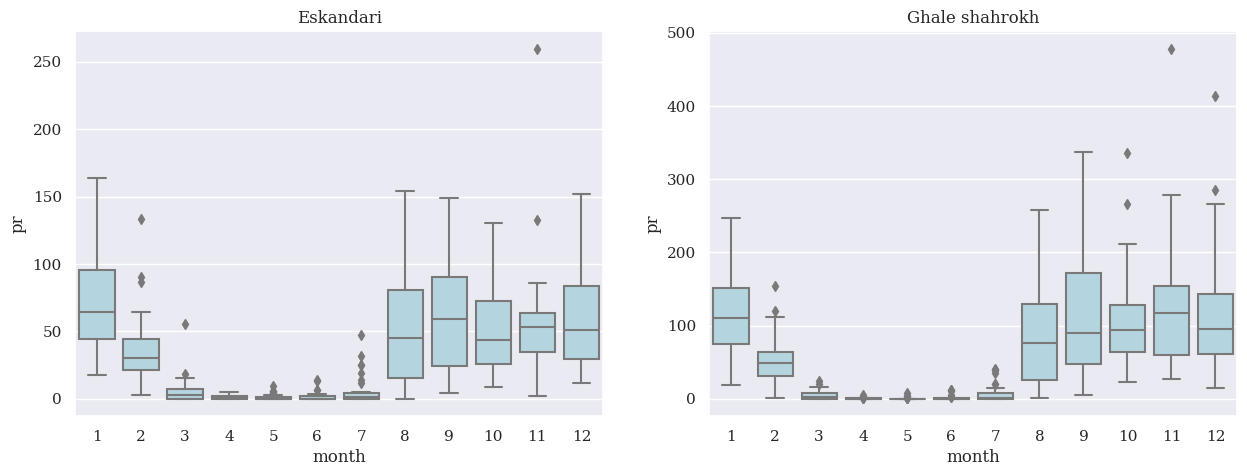

In [11]:
rcParams['figure.figsize'] = 15, 5
fig, ax = plt.subplots(1, 2)
ax1 = sns.boxplot(x='month',y='pr',data=eskandari,ax=ax[0], color='lightblue')
ax1.set_title('Eskandari',fontsize=12)
ax2 = sns.boxplot(x='month',y='pr',data=ghale_shahrokh,ax=ax[1], color='lightblue')
ax2.set_title('Ghale shahrokh',fontsize=12)

plt.savefig('/content/drive/MyDrive/Upstream_basin_models/pr.png', dpi=300)
plt.show()

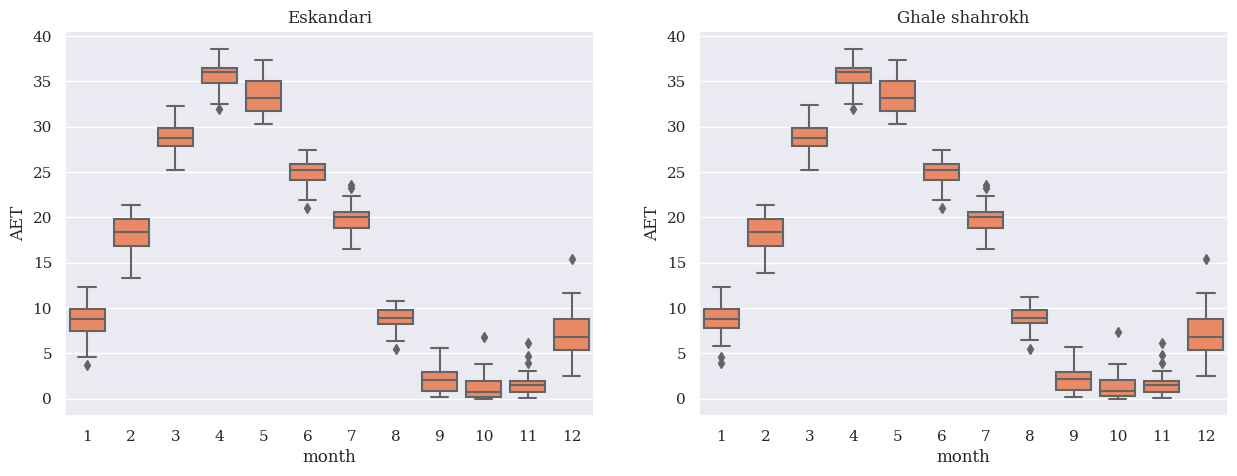

In [12]:
rcParams['figure.figsize'] = 15, 5
fig, ax = plt.subplots(1, 2)
ax1 = sns.boxplot(x='month',y='AET',data=eskandari,ax=ax[0], color='coral')
ax1.set_title('Eskandari',fontsize=12)
ax2 = sns.boxplot(x='month',y='AET',data=ghale_shahrokh,ax=ax[1], color='coral')
ax2.set_title('Ghale shahrokh',fontsize=12)

plt.savefig('/content/drive/MyDrive/Upstream_basin_models/AET.png', dpi=300)
plt.show()

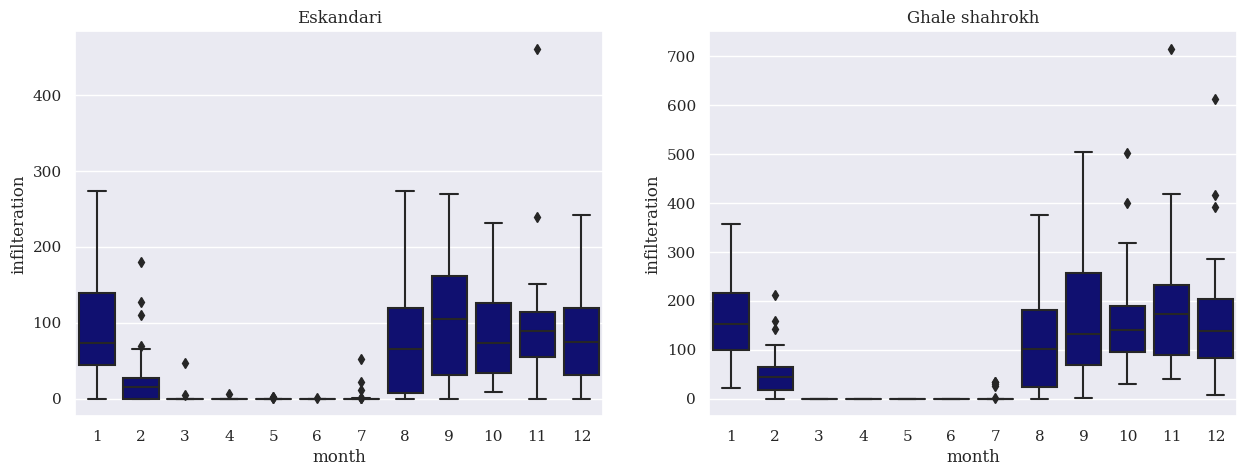

In [13]:
rcParams['figure.figsize'] = 15, 5
fig, ax = plt.subplots(1, 2)
ax1 = sns.boxplot(x='month',y='infilteration',data=eskandari,ax=ax[0], color='navy')
ax1.set_title('Eskandari',fontsize=12)
ax2 = sns.boxplot(x='month',y='infilteration',data=ghale_shahrokh,ax=ax[1], color='navy')
ax2.set_title('Ghale shahrokh',fontsize=12)

plt.savefig('/content/drive/MyDrive/Upstream_basin_models/infilteration.png', dpi=300)
plt.show()

# **Model ExtraTree eskandari**

In [14]:
x = eskandari.drop(['year', 'month', 'infilteration'], axis=1)
y = eskandari.infilteration

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [16]:
EXtree = ExtraTreesRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 500],
    'max_depth' : [6,8, 10],
}
CV_EXtree = GridSearchCV(estimator=EXtree, param_grid=param_grid, cv= 5)
CV_EXtree.fit(x_train, y_train)
m, max_d = list(CV_EXtree.best_params_.values())
print(CV_EXtree.best_params_)

{'max_depth': 10, 'n_estimators': 100}


In [17]:
model = ExtraTreesRegressor(n_estimators=m , max_depth=max_d )
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
eval_dict = {'test size': 0.25,
              'MAE':'%.3f' % metrics.mean_absolute_error(y_test, y_pred),
              'MSE':'%.3f' %metrics.mean_squared_error(y_test, y_pred),
              'RMSE':'%.3f' %np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
              'R2 Score':'%.3f' %metrics.r2_score(y_test, y_pred),
              'R':'%.3f' % np.sqrt(metrics.r2_score(y_test, y_pred))
              }
eval_dict

{'test size': 0.25,
 'MAE': '2.923',
 'MSE': '38.378',
 'RMSE': '6.195',
 'R2 Score': '0.992',
 'R': '0.996'}

In [18]:
val = []
key = []
for i in eval_dict.values():
  val.append(i)
for j in eval_dict.keys():
  key.append(j)
eval_df = pd.DataFrame()
eval_df.insert(0, 'None', key)
eval_df.insert(1, 'value', val)
header_row = eval_df.iloc[0]
eval_df = pd.DataFrame(eval_df.values[1:], columns=header_row)
eval_df.to_csv('eskandari_Result_Extra.csv')

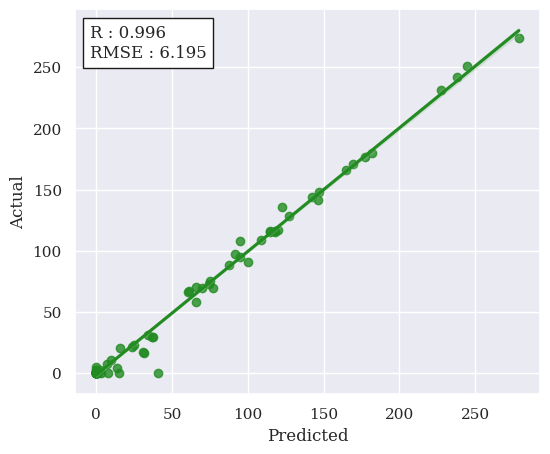

In [19]:
from matplotlib.offsetbox import AnchoredText
compare = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

rcParams['figure.figsize'] = 6, 5
fig = sns.regplot(data = compare, x = compare.Predicted, y = compare.Actual, color = 'forestgreen')
text1 = f'R : {np.round(np.sqrt(metrics.r2_score(compare.Actual, compare.Predicted)), 3)}'+ '\n'+f'RMSE : {np.round(np.sqrt(metrics.mean_squared_error(compare.Actual, compare.Predicted)), 3)}'


text = text1
anc = AnchoredText(text, loc="upper left", frameon=True, pad=0.4)
fig.add_artist(anc)
fig.title.set_size(15)
fig.title.set_fontweight('bold')
plt.savefig('eskandari_Result_Extra', dpi=400)
plt.show()

# **Model ExtraTree ghale_shahrokh**

In [20]:
x = ghale_shahrokh.drop(['year', 'month', 'infilteration'], axis=1)
y = ghale_shahrokh.infilteration

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [22]:
EXtree = ExtraTreesRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 500],
    'max_depth' : [6,8, 10],
}
CV_EXtree = GridSearchCV(estimator=EXtree, param_grid=param_grid, cv= 5)
CV_EXtree.fit(x_train, y_train)
m, max_d = list(CV_EXtree.best_params_.values())
print(CV_EXtree.best_params_)

{'max_depth': 10, 'n_estimators': 500}


In [23]:
model = ExtraTreesRegressor(n_estimators=500 , max_depth=6)
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
eval_dict = {'test size': 0.25,
              'MAE':'%.3f' % metrics.mean_absolute_error(y_test, y_pred),
              'MSE':'%.3f' %metrics.mean_squared_error(y_test, y_pred),
              'RMSE':'%.3f' %np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
              'R2 Score':'%.3f' %metrics.r2_score(y_test, y_pred),
              'R':'%.3f' % np.sqrt(metrics.r2_score(y_test, y_pred))
              }
eval_dict

{'test size': 0.25,
 'MAE': '2.855',
 'MSE': '20.176',
 'RMSE': '4.492',
 'R2 Score': '0.999',
 'R': '0.999'}

In [24]:
val = []
key = []
for i in eval_dict.values():
  val.append(i)
for j in eval_dict.keys():
  key.append(j)
eval_df = pd.DataFrame()
eval_df.insert(0, 'None', key)
eval_df.insert(1, 'value', val)
header_row = eval_df.iloc[0]
eval_df = pd.DataFrame(eval_df.values[1:], columns=header_row)
eval_df.to_csv('ghale_shahrokh_Result_Extra.csv')

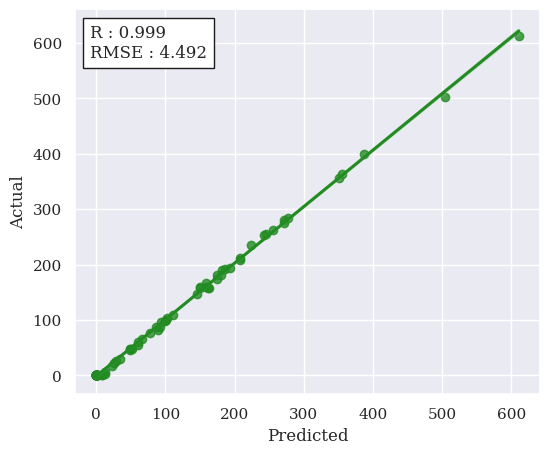

In [25]:
from matplotlib.offsetbox import AnchoredText
compare = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

rcParams['figure.figsize'] = 6, 5
fig = sns.regplot(data = compare, x = compare.Predicted, y = compare.Actual, color = 'forestgreen')
text1 = f'R : {np.round(np.sqrt(metrics.r2_score(compare.Actual, compare.Predicted)), 3)}'+ '\n'+f'RMSE : {np.round(np.sqrt(metrics.mean_squared_error(compare.Actual, compare.Predicted)), 3)}'


text = text1
anc = AnchoredText(text, loc="upper left", frameon=True, pad=0.4)
fig.add_artist(anc)
fig.title.set_size(15)
fig.title.set_fontweight('bold')
plt.savefig('ghale_shahrokh_Result_Extra', dpi=400)
plt.show()

# **Prediction By ExtraModel**

**Data**

In [ ]:
path_126='/content/drive/MyDrive/Upstream_basin_models/Upstream_126.xlsx'
path_245='/content/drive/MyDrive/Upstream_basin_models/Upstream_245.xlsx'
path_585='/content/drive/MyDrive/Upstream_basin_models/Upstream_585.xlsx'

df_ssp126 = pd.read_excel(path_126, 'ghale_shahrokh').dropna(axis=0)
df_ssp245 = pd.read_excel(path_245, 'ghale_shahrokh').dropna(axis=0)
df_ssp585 = pd.read_excel(path_585, 'ghale_shahrokh').dropna(axis=0)

In [ ]:
date = df_ssp126.drop(['sub_basin', 'month_name',  'temp_126', 'pr_126',
       'discharge', 'AET'], axis=1)

In [ ]:
x_pred_126 = df_ssp126.drop({'sub_basin', 'year', 'month_name', 'month'}, axis=1)
x_pred_126.rename(columns={'temp_126':'tempreture',	'pr_126':'pr' ,	'discharge':'Runoff'}, inplace=True)
x_pred_245 = df_ssp245.drop({'sub_basin', 'year', 'month_name', 'month'}, axis=1)
x_pred_245.rename(columns={'temp_245':'tempreture',	'pr_245':'pr' ,	'discharge':'Runoff'}, inplace=True)
x_pred_585 = df_ssp585.drop({'sub_basin', 'year', 'month_name', 'month'}, axis=1)
x_pred_585.rename(columns={'temp_585':'tempreture',	'pr_585':'pr' ,	'discharge':'Runoff'}, inplace=True)

In [ ]:
model = ExtraTreesRegressor(n_estimators=m , max_depth=max_d)
model.fit(x , y)
y_pred_126 = model.predict(x_pred_126)
y_pred_245 = model.predict(x_pred_245)
y_pred_585 = model.predict(x_pred_585)

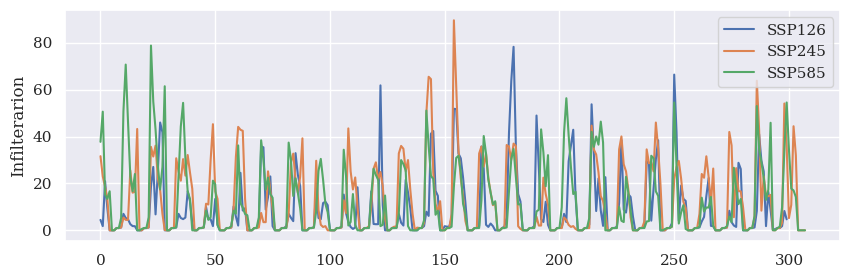

In [ ]:
rcParams['figure.figsize'] = 10, 3
plt.plot(y_pred_126)
plt.plot(y_pred_245)
plt.plot(y_pred_585)
plt.legend(['SSP126', 'SSP245', 'SSP585'])
plt.ylabel('Infilterarion')
# plt.xlabel('Index')
plt.savefig('ghale_shahrokh_Result_predicted_infilteration_for_scenarios.png', dpi=300)

In [ ]:
len(y_pred_126), len(y_pred_245), len(y_pred_585)

(300, 308, 308)

In [ ]:
result_final = pd.DataFrame({
    'year': date.year,
    'month': date.month,
    'scenario_126': y_pred_126,
    'scenario_245': y_pred_245[0:300],
    'scenario_585': y_pred_585[0:300],
})
result_final['scenario_126'] = result_final['scenario_126'].apply(lambda x : x if x > 0 else 0)
result_final['scenario_245'] = result_final['scenario_245'].apply(lambda x : x if x > 0 else 0)
result_final['scenario_585'] = result_final['scenario_585'].apply(lambda x : x if x > 0 else 0)

result_final.to_csv('ghale_shahrokh_Result_SSPs.csv')

In [ ]:
!zip ghale_shahrokh_result.zip gha*

updating: ghale_shahrokh_Result_Extra.csv (deflated 6%)
updating: ghale_shahrokh_Result_Extra.png (deflated 16%)
updating: ghale_shahrokh_Result_SSPs.csv (deflated 66%)
  adding: ghale_shahrokh_Result_predicted_infilteration_for_scenarios.png (deflated 4%)
